# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './Part01/'

In [26]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train).head(1000)
app_train.shape

MemoryError: Unable to allocate array with shape (65, 307511) and data type float64

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            #print(app_train[col])
            app_train[col] = le.fit_transform(app_train[col])   
            #print(app_train[col])
            
print(app_train.shape)
app_train.head()

(1000, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [7]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    0.020122
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.036947
CODE_GENDER                   0.074324
FLAG_OWN_CAR                 -0.028648
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.025604
AMT_REQ_CREDIT_BUREAU_MON     0.057466
AMT_REQ_CREDIT_BUREAU_QRT    -0.029575
AMT_REQ_CREDIT_BUREAU_YEAR   -0.036700
DAYS_EMPLOYED_ANOM           -0.011390
Name: TARGET, Length: 111, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [8]:
sub_df = pd.Series(app_train.corr()['TARGET'])
sub_df.nlargest(15)

TARGET                        1.000000
DAYS_EMPLOYED                 0.118486
FLAG_DOCUMENT_18              0.091685
DAYS_LAST_PHONE_CHANGE        0.074336
CODE_GENDER                   0.074324
COMMONAREA_MODE               0.073427
COMMONAREA_MEDI               0.064574
COMMONAREA_AVG                0.064366
YEARS_BUILD_MODE              0.061698
AMT_REQ_CREDIT_BUREAU_MON     0.057466
YEARS_BUILD_MEDI              0.056321
YEARS_BUILD_AVG               0.056153
DAYS_ID_PUBLISH               0.055298
REG_REGION_NOT_LIVE_REGION    0.051294
REG_CITY_NOT_WORK_CITY        0.049782
Name: TARGET, dtype: float64

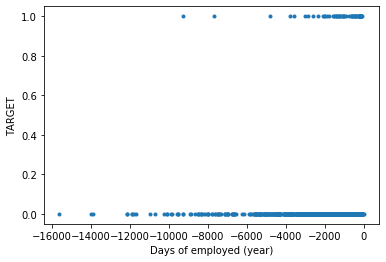

Correlation: nan


In [24]:
plt.plot(app_train['DAYS_EMPLOYED'],app_train['TARGET'],'.')
plt.xlabel('Days of employed (year)')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['DAYS_EMPLOYED'], app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

In [9]:
sub_df.nsmallest(15)

EXT_SOURCE_3                   -0.236136
EXT_SOURCE_2                   -0.195020
YEARS_BEGINEXPLUATATION_MEDI   -0.134431
EXT_SOURCE_1                   -0.126033
YEARS_BEGINEXPLUATATION_AVG    -0.109070
YEARS_BEGINEXPLUATATION_MODE   -0.098599
DAYS_BIRTH                     -0.082559
LANDAREA_AVG                   -0.056691
NONLIVINGAPARTMENTS_MODE       -0.056173
LANDAREA_MEDI                  -0.055167
NONLIVINGAPARTMENTS_MEDI       -0.053457
NONLIVINGAPARTMENTS_AVG        -0.052668
LANDAREA_MODE                  -0.048706
HOUR_APPR_PROCESS_START        -0.047768
OWN_CAR_AGE                    -0.042834
Name: TARGET, dtype: float64